In [76]:
import numpy as np
import matplotlib.pyplot as plt

class LinearLayer:
    def __init__(self):
        self.mem = {}

    def forward(self, x, W, b):
        h = np.matmul(x, W) + b
        self.mem={'x': x, 'W':W, 'b':b}
        return h

    def backward(self, grad_y):
        x = self.mem['x']
        W = self.mem['W']
        b = self.mem['b']
        grad_x = np.matmul(grad_y, W.T)
        grad_W = np.matmul(x.T, grad_y)
        grad_b = np.sum(grad_y, axis=0)
        return grad_x, grad_W, grad_b

class ReLU:
    def __init__(self):
        self.mem = {}

    def forward(self, x):
        self.mem['x']=x
        return np.where(x > 0, x, np.zeros_like(x))

    def backward(self, grad_y):
        x = self.mem['x']
        grad_x = np.where(x > 0,grad_y, np.zeros_like(grad_y))
        return grad_x

class TwoLayerReLUNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.normal(size=[input_size, hidden_size])
        self.W2 = np.random.normal(size=[hidden_size, output_size])
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))
        self.lin1 = LinearLayer()
        self.lin2 = LinearLayer()
        self.relu = ReLU()

    def forward(self, x):
        self.h1 = self.lin1.forward(x, self.W1, self.b1)
        self.h1_relu = self.relu.forward(self.h1)
        self.h2 = self.lin2.forward(self.h1_relu, self.W2, self.b2)
        return self.h2

    def backward(self, y):
        grad_y = 2 * (self.h2 - y) / y.shape[0]
        self.h2_grad, self.W2_grad, self.b2_grad = self.lin2.backward(grad_y)
        self.h1_relu_grad = self.relu.backward(self.h2_grad)
        self.h1_grad, self.W1_grad, self.b1_grad = self.lin1.backward(self.h1_relu_grad)


In [77]:
def compute_loss(output, y):
    return np.mean((output - y) ** 2)

def train_one_step(model, x, y, lr):
    model.forward(x)
    model.backward(y)
    model.W1 -= lr* model.W1_grad
    model.W2 -= lr* model.W2_grad
    model.b1 -= lr* model.b1_grad
    model.b2 -= lr* model.b2_grad
    loss = compute_loss(model.h2, y)
    return loss

def test(model, x, y):
    model.forward(x)
    loss = compute_loss(model.h2, y)
    return loss

In [158]:
def target_function(x):
    return np.sin(np.pi * x) + 0.5 * np.cos(2 * np.pi * x)
    # return x**2 - 0.4*x +0.25

In [167]:
np.random.seed(42)
x_train = np.random.uniform(-1, 1, 1000).reshape(-1, 1)
y_train = target_function(x_train)
x_test = np.linspace(-1, 1, 100).reshape(-1, 1)
y_test = target_function(x_test)
print("x_train[:5]:", x_train[:5])
print("y_train[:5]:", y_train[:5])

x_train[:5]: [[-0.25091976]
 [ 0.90142861]
 [ 0.46398788]
 [ 0.19731697]
 [-0.68796272]]
y_train[:5]: [[-0.71203653]
 [ 0.71187566]
 [ 0.50635212]
 [ 0.74344787]
 [-1.020659  ]]


In [171]:
model = TwoLayerReLUNet(input_size=1, hidden_size=64, output_size=1)
losses = []
for epoch in range(500):
    loss = train_one_step(model, x_train, y_train, lr=1e-2)
    losses.append(loss)
    if epoch%10 == 0:
      print('epoch', epoch, ': loss', loss)
loss = test(model, x_test, y_test)
y_pred = model.forward(x_test)

epoch 0 : loss 6.590727040258339
epoch 10 : loss 0.6338261029375145
epoch 20 : loss 0.4015214220361453
epoch 30 : loss 0.2965057863091686
epoch 40 : loss 0.24879296257649075
epoch 50 : loss 0.22369126832571493
epoch 60 : loss 0.20920372985955593
epoch 70 : loss 0.20058795493827206
epoch 80 : loss 0.19478091716431958
epoch 90 : loss 0.1900425686708576
epoch 100 : loss 0.18546995781832357
epoch 110 : loss 0.18083398209418344
epoch 120 : loss 0.17568857534258234
epoch 130 : loss 0.16971331995893446
epoch 140 : loss 0.16296910719476052
epoch 150 : loss 0.15577903129403115
epoch 160 : loss 0.14817661122318054
epoch 170 : loss 0.14055526761281847
epoch 180 : loss 0.13322031942838355
epoch 190 : loss 0.12637136893703052
epoch 200 : loss 0.12006783281744937
epoch 210 : loss 0.11411129815237334
epoch 220 : loss 0.10836315011063431
epoch 230 : loss 0.102858632064633
epoch 240 : loss 0.09758707936732733
epoch 250 : loss 0.09248944500268275
epoch 260 : loss 0.08749714266107758
epoch 270 : loss 0.0

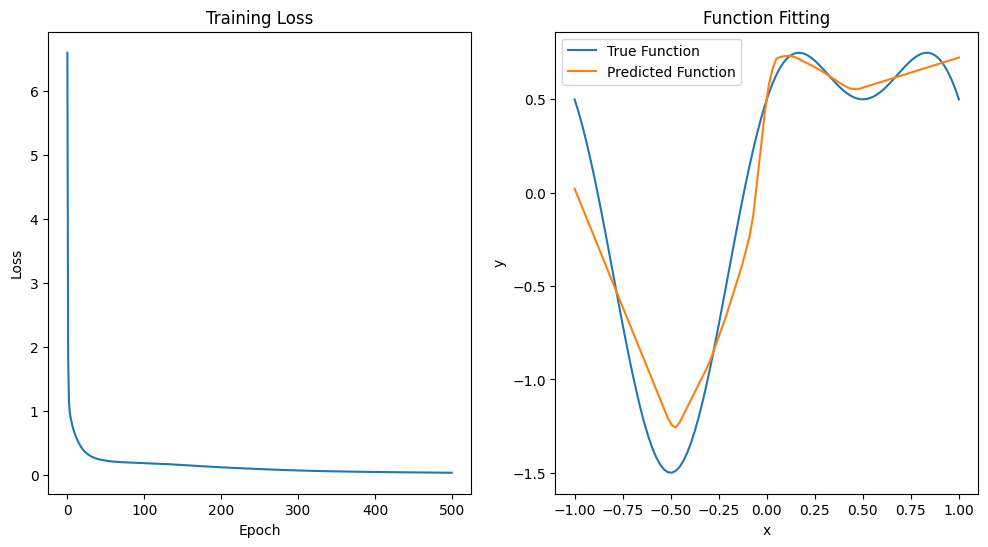

In [172]:
# 绘制结果
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, label="True Function")
plt.plot(x_test, y_pred, label="Predicted Function")
plt.title("Function Fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()